## Featre Addition

### 1) 주변링크의 평균 통행

In [12]:
import pandas as pd


pd.options.display.float_format = '{: .2f}'.format

pub_station = pd.read_csv('../data/main_tables/PUB_STATION.csv')
link = pd.read_csv('../data/qgis/stationbuffer_x_links.csv', usecols=['sid', 'LINK_ID'])
trip = pd.read_csv('../data/qgis/taxi_trip.csv', encoding='cp949').rename(columns={' 평균통행량 ':'mean_trip', '링크아이디':'LINK_ID'})

In [13]:
display(pub_station.head())
display(link.head())
display(trip.head())

,station_name,sid,address,lat,long,district_lv2,district_lv3,fast_cnt,slow_cnt,mean_speed
0,화양강휴게소,강원_홍천_화양강휴게소,강원도 홍천군 두촌면 철정리 978-6,37.80,127.99,강원도_홍천군,강원도_홍천군_두촌면,1,0,50.00
1,상암월드컵경기장,서울_마포용산_상암월드컵경기장,서울특별시 마포구 성산동 531,37.57,126.89,서울특별시_마포구,서울특별시_마포구_성산동,7,3,50.00
2,대정읍사무소,제주_서귀포_대정읍사무소,제주특별자치도 서귀포시 대정읍 하모리 1413,33.23,126.25,제주특별자치도_서귀포시,제주특별자치도_서귀포시_대정읍,4,0,50.00
3,애월119센터,제주_제주직할_애월119센터,제주특별자치도 제주시 애월읍 일주서로 6513,33.47,126.35,제주특별자치도_제주시,제주특별자치도_제주시_애월읍,2,0,50.00
4,수성구민운동장,대구_동대구_수성구민운동장,대구광역시 수성구 범어동 630-1,35.85,128.63,대구광역시_수성구,대구광역시_수성구_범어동,1,2,50.00


,sid,LINK_ID
0,강원_홍천_화양강휴게소,2570039102.00
1,강원_홍천_화양강휴게소,2570039202.00
2,강원_홍천_화양강휴게소,2570133000.00
3,강원_홍천_화양강휴게소,2570133100.00
4,강원_홍천_화양강휴게소,2570133300.00


,지역,LINK_ID,도로명,mean_trip
0,서울특별시 종로구,1000000301,종로,297.20
1,서울특별시 종로구,1000000302,종로,179.50
2,서울특별시 종로구,1000000303,종로,147.40
3,서울특별시 종로구,1000000401,종로,354.20
4,서울특별시 종로구,1000000402,종로,315.40


In [14]:
# 링크 데이터에 평균 통행 조인 이후, sid단위로 평균 집계
mean_trip = link.merge(trip[['LINK_ID', 'mean_trip']], how='left', on='LINK_ID').groupby(['sid']).mean_trip.mean()
mean_trip

sid
강원_강릉_HAPPY700 평창시네마      26.23
강원_강릉_감자연구소               63.23
강원_강릉_강남동주민센터            216.67
강원_강릉_강릉농협 하나로마트        1768.30
강원_강릉_강릉축협 하나로마트         901.94
                         ...   
충북_충주_중앙탑면 행정복지센터         54.12
충북_충주_충주시청 민원주차장         497.77
충북_충주_충주실내체육관            991.82
충북_충주_충주종합스포츠타운          126.17
충북_충주_평생학습관              419.35
Name: mean_trip, Length: 1304, dtype: float64

In [15]:
pub_station = pub_station.merge(mean_trip, on='sid')
pub_station.head()

,station_name,sid,address,lat,long,district_lv2,district_lv3,fast_cnt,slow_cnt,mean_speed,mean_trip
0,화양강휴게소,강원_홍천_화양강휴게소,강원도 홍천군 두촌면 철정리 978-6,37.80,127.99,강원도_홍천군,강원도_홍천군_두촌면,1,0,50.00,16.25
1,상암월드컵경기장,서울_마포용산_상암월드컵경기장,서울특별시 마포구 성산동 531,37.57,126.89,서울특별시_마포구,서울특별시_마포구_성산동,7,3,50.00,128.35
2,대정읍사무소,제주_서귀포_대정읍사무소,제주특별자치도 서귀포시 대정읍 하모리 1413,33.23,126.25,제주특별자치도_서귀포시,제주특별자치도_서귀포시_대정읍,4,0,50.00,31.89
3,애월119센터,제주_제주직할_애월119센터,제주특별자치도 제주시 애월읍 일주서로 6513,33.47,126.35,제주특별자치도_제주시,제주특별자치도_제주시_애월읍,2,0,50.00,101.35
4,수성구민운동장,대구_동대구_수성구민운동장,대구광역시 수성구 범어동 630-1,35.85,128.63,대구광역시_수성구,대구광역시_수성구_범어동,1,2,50.00,351.55


In [16]:
pub_station.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1304 entries, 0 to 1303
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   station_name  1304 non-null   object 
 1   sid           1304 non-null   object 
 2   address       1304 non-null   object 
 3   lat           1304 non-null   float64
 4   long          1304 non-null   float64
 5   district_lv2  1304 non-null   object 
 6   district_lv3  1304 non-null   object 
 7   fast_cnt      1304 non-null   int64  
 8   slow_cnt      1304 non-null   int64  
 9   mean_speed    1293 non-null   float64
 10  mean_trip     1216 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 122.2+ KB


### 2) 도로종류별 길이

In [17]:
length = pd.read_csv('../data/qgis/stationbuffer_x_linklength.csv', usecols=['sid', 'length_highway', 'length_national', 'length_local', 'length_city'])

In [18]:
length.head()

,sid,length_highway,length_national,length_local,length_city
0,강원_홍천_화양강휴게소,0.00,2065.53,0.00,2590.38
1,서울_마포용산_상암월드컵경기장,499.55,4236.51,0.00,2929.40
2,제주_서귀포_대정읍사무소,0.00,0.00,1816.24,7394.46
3,제주_제주직할_애월119센터,0.00,0.00,1963.83,405.02
4,대구_동대구_수성구민운동장,0.00,0.00,0.00,5064.36


In [19]:
pub_station = pub_station.merge(length, how='left', on='sid')
pub_station.head()

,station_name,sid,address,lat,long,district_lv2,district_lv3,fast_cnt,slow_cnt,mean_speed,mean_trip,length_highway,length_national,length_local,length_city
0,화양강휴게소,강원_홍천_화양강휴게소,강원도 홍천군 두촌면 철정리 978-6,37.80,127.99,강원도_홍천군,강원도_홍천군_두촌면,1,0,50.00,16.25,0.00,2065.53,0.00,2590.38
1,상암월드컵경기장,서울_마포용산_상암월드컵경기장,서울특별시 마포구 성산동 531,37.57,126.89,서울특별시_마포구,서울특별시_마포구_성산동,7,3,50.00,128.35,499.55,4236.51,0.00,2929.40
2,대정읍사무소,제주_서귀포_대정읍사무소,제주특별자치도 서귀포시 대정읍 하모리 1413,33.23,126.25,제주특별자치도_서귀포시,제주특별자치도_서귀포시_대정읍,4,0,50.00,31.89,0.00,0.00,1816.24,7394.46
3,애월119센터,제주_제주직할_애월119센터,제주특별자치도 제주시 애월읍 일주서로 6513,33.47,126.35,제주특별자치도_제주시,제주특별자치도_제주시_애월읍,2,0,50.00,101.35,0.00,0.00,1963.83,405.02
4,수성구민운동장,대구_동대구_수성구민운동장,대구광역시 수성구 범어동 630-1,35.85,128.63,대구광역시_수성구,대구광역시_수성구_범어동,1,2,50.00,351.55,0.00,0.00,0.00,5064.36


In [20]:
pub_station.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1304 entries, 0 to 1303
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   station_name     1304 non-null   object 
 1   sid              1304 non-null   object 
 2   address          1304 non-null   object 
 3   lat              1304 non-null   float64
 4   long             1304 non-null   float64
 5   district_lv2     1304 non-null   object 
 6   district_lv3     1304 non-null   object 
 7   fast_cnt         1304 non-null   int64  
 8   slow_cnt         1304 non-null   int64  
 9   mean_speed       1293 non-null   float64
 10  mean_trip        1216 non-null   float64
 11  length_highway   1304 non-null   float64
 12  length_national  1304 non-null   float64
 13  length_local     1304 non-null   float64
 14  length_city      1304 non-null   float64
dtypes: float64(8), int64(2), object(5)
memory usage: 163.0+ KB


### 3) 반경 내 용도지역
- 용도지역 코드 전처리
    - 슬라이싱 및 인코딩 필요
- 용도지역 데이터가 '도시지역'에 제한되어있어 매핑된 sid도 도시지역만 남음

In [21]:
district = pd.read_csv('../data/qgis/stationbuffer_x_district.csv', usecols=['sid', 'A1', 'area'])
district.head()

,sid,A1,area
0,서울_마포용산_상암월드컵경기장,61100001144020140145UQA4300417003,80670.19
1,서울_마포용산_상암월드컵경기장,15000001144020039117UQA1230001001,1695.40
2,서울_마포용산_상암월드컵경기장,15000001144020020001UQA4300001001,159593.97
3,서울_마포용산_상암월드컵경기장,61100001144020130103UQA1220426011,35212.77
4,서울_마포용산_상암월드컵경기장,61100001144020130103UQA1300426012,193026.33


In [22]:
import numpy as np

district['dcode'] = district['A1'].map(lambda x: x[20:26] if x is not np.nan else x) \
                                  .map(lambda x: 'UQA500' if x ==  'UAQ500'  else x)

In [23]:
dgm = pd.read_csv('../data/dgm_code.csv', encoding='cp949')

In [24]:
dgm.head()

,UCODE,UNAME,DIV,LAW_NM,AR_GBN,LAW_CD,BYUL_YN,EXEC_DT,JO_NO,JO_SUB_NO,REC_SEQNO,PARENT_UCODE,DEL_DT,DEL_TXT,TERMS_NO,FRST_REGIST_DT,LAST_UPDT_DT
0,UNIM04,비행안전 제4구역,군사,군사기지 및 군사시설 보호법,NaN,10375.00,0.00,20080922.00,400.00,0.00,530.00,UNE400,NaN,NaN,NaN,20220908,20220908
1,UHK100,일반물류단지,공업,물류시설의 개발 및 운영에 관한 법률 제22조,NaN,10387.00,0.00,20080906.00,2200.00,0.00,1020.00,000000,NaN,NaN,205.00,20220908,20220908
2,UMK400,(한강)건축 등 허가제한지역,환경,한강수계 상수원수질개선 및 주민지원 등에 관한 법률,NaN,9136.00,0.00,20140131.00,500.00,0.00,2132.00,000000,NaN,NaN,NaN,20220908,20220908
3,UNE114,통제보호구역(해군기지),국방,군사기지 및 군사시설 보호법,NaN,10375.00,0.00,20090910.00,400.00,0.00,NaN,UNE110,NaN,NaN,NaN,20220908,20220908
4,UQS700,항만,국토종합,국토의 계획 및 이용에 관한 법률 시행령,NaN,9419.00,0.00,20170101.00,8300.00,1000000000.00,NaN,NaN,NaN,NaN,NaN,20220908,20220908


In [25]:
# 참고: https://alpmint.tistory.com/1922
# 코드 변환 데이터에 존재하지 않는 코드는 검색으로 찾아 수동으로 부여
dcode_table = pd.DataFrame(district.dcode.unique(), columns=['dcode'])
dcode_table = dcode_table.merge(dgm[['UCODE', 'UNAME']], how='left', left_on='dcode', right_on='UCODE').drop(columns=['UCODE'])
dcode_table = dcode_table.sort_values('dcode').rename(columns={'UNAME':'dname'})
dcode_table['counts'] = district.drop_duplicates(['sid', 'dcode']).dcode.value_counts().sort_index().values
dcode_table.loc[dcode_table.dcode == 'UQA500', 'dname'] = '도시지역미지정'
dcode_table.loc[dcode_table.dcode == 'UQA999', 'dname'] = '도시지역기타'
dcode_table.loc[dcode_table.dcode == 'UQA01X', 'dname'] = 'error'
dcode_table

,dcode,dname,counts
12,UQA01X,error,258
21,UQA100,주거지역,2
8,UQA111,제1종전용주거지역,46
17,UQA112,제2종전용주거지역,25
11,UQA120,일반주거지역,9
4,UQA121,제1종일반주거지역,684
2,UQA122,제2종일반주거지역,889
1,UQA123,제3종일반주거지역,514
3,UQA130,준주거지역,564
20,UQA200,상업지역,2


In [26]:
# 세부 분류를 그룹화
def decode_grouper(name):
    if '주거' in name:
        return '주거지역'
    if '상업' in name:
        return '상업지역'
    if '녹지' in name:
        return '녹지지역'
    if '공업' in name:
        return '공업지역'
    return '기타'

In [27]:
dcode_table.dname = dcode_table.dname.map(decode_grouper)
dcode_table

,dcode,dname,counts
12,UQA01X,기타,258
21,UQA100,주거지역,2
8,UQA111,주거지역,46
17,UQA112,주거지역,25
11,UQA120,주거지역,9
4,UQA121,주거지역,684
2,UQA122,주거지역,889
1,UQA123,주거지역,514
3,UQA130,주거지역,564
20,UQA200,상업지역,2


In [28]:
district = district.merge(dcode_table[['dcode', 'dname']], how='left', on='dcode').drop(columns=['A1', 'dcode'])

In [29]:
district.head()

,sid,area,dname
0,서울_마포용산_상암월드컵경기장,80670.19,녹지지역
1,서울_마포용산_상암월드컵경기장,1695.40,주거지역
2,서울_마포용산_상암월드컵경기장,159593.97,녹지지역
3,서울_마포용산_상암월드컵경기장,35212.77,주거지역
4,서울_마포용산_상암월드컵경기장,193026.33,주거지역


<AxesSubplot: ylabel='Frequency'>

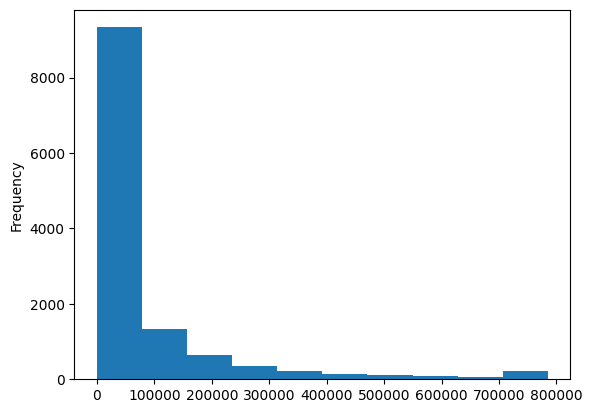

In [30]:
district.area.plot(kind='hist')

In [31]:
district = district.groupby(['sid', 'dname']).area.sum().to_frame().reset_index()

In [32]:
district.head()

,sid,dname,area
0,강원_강릉_강남동주민센터,녹지지역,423671.88
1,강원_강릉_강남동주민센터,주거지역,360979.87
2,강원_강릉_강릉농협 하나로마트,녹지지역,205504.87
3,강원_강릉_강릉농협 하나로마트,상업지역,255227.75
4,강원_강릉_강릉농협 하나로마트,주거지역,323921.02


In [33]:
# 각 용도지역 너비의 합을 1로 처리

def normalize_area(sid_df):
        sid_df.area = sid_df.area / sid_df.area.sum()
        return sid_df

district = district.groupby('sid', group_keys=False).apply(normalize_area)        

<AxesSubplot: ylabel='Frequency'>

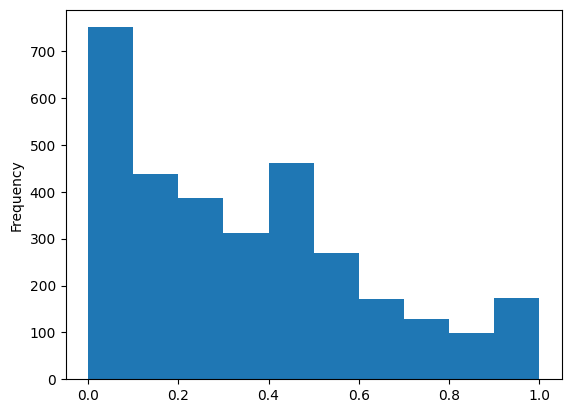

In [34]:
district.area.plot(kind='hist')

In [35]:
# 각 sid별 최다 지역
major_dcode = district.sort_values('area', ascending=False).groupby('sid').dname.first()
major_dcode.head(3)

sid
강원_강릉_강남동주민센터       녹지지역
강원_강릉_강릉농협 하나로마트    주거지역
강원_강릉_강릉축협 하나로마트    주거지역
Name: dname, dtype: object

In [36]:
# 각 sid별 용도지역 차지비율
district_ratio = district.pivot(index='sid', columns='dname', values='area').reset_index().fillna(0) \
                         .rename(columns={'공업지역':'indust_ratio', '기타':'etc_ratio', '녹지지역':'green_ratio', '상업지역':'commerce_ratio', '주거지역':'reside_ratio'})
district_ratio.head(3)

dname,sid,indust_ratio,etc_ratio,green_ratio,commerce_ratio,reside_ratio
0,강원_강릉_강남동주민센터,0.00,0.00,0.54,0.00,0.46
1,강원_강릉_강릉농협 하나로마트,0.00,0.00,0.26,0.33,0.41
2,강원_강릉_강릉축협 하나로마트,0.00,0.00,0.42,0.00,0.58


In [37]:
pub_station = pub_station.merge(district_ratio, how='left', on='sid').merge(major_dcode, how='left', on='sid')
pub_station.head(3)

,station_name,sid,address,lat,long,district_lv2,district_lv3,fast_cnt,slow_cnt,mean_speed,...,length_highway,length_national,length_local,length_city,indust_ratio,etc_ratio,green_ratio,commerce_ratio,reside_ratio,dname
0,화양강휴게소,강원_홍천_화양강휴게소,강원도 홍천군 두촌면 철정리 978-6,37.80,127.99,강원도_홍천군,강원도_홍천군_두촌면,1,0,50.00,...,0.00,2065.53,0.00,2590.38,NaN,NaN,NaN,NaN,NaN,NaN
1,상암월드컵경기장,서울_마포용산_상암월드컵경기장,서울특별시 마포구 성산동 531,37.57,126.89,서울특별시_마포구,서울특별시_마포구_성산동,7,3,50.00,...,499.55,4236.51,0.00,2929.40,0.00,0.00,0.68,0.00,0.32,녹지지역
2,대정읍사무소,제주_서귀포_대정읍사무소,제주특별자치도 서귀포시 대정읍 하모리 1413,33.23,126.25,제주특별자치도_서귀포시,제주특별자치도_서귀포시_대정읍,4,0,50.00,...,0.00,0.00,1816.24,7394.46,0.00,0.00,0.30,0.12,0.58,주거지역


In [38]:
pub_station.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1304 entries, 0 to 1303
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   station_name     1304 non-null   object 
 1   sid              1304 non-null   object 
 2   address          1304 non-null   object 
 3   lat              1304 non-null   float64
 4   long             1304 non-null   float64
 5   district_lv2     1304 non-null   object 
 6   district_lv3     1304 non-null   object 
 7   fast_cnt         1304 non-null   int64  
 8   slow_cnt         1304 non-null   int64  
 9   mean_speed       1293 non-null   float64
 10  mean_trip        1216 non-null   float64
 11  length_highway   1304 non-null   float64
 12  length_national  1304 non-null   float64
 13  length_local     1304 non-null   float64
 14  length_city      1304 non-null   float64
 15  indust_ratio     1122 non-null   float64
 16  etc_ratio        1122 non-null   float64
 17  green_ratio   

## Dimensionality Reduction

In [39]:
# null 행 제거
pub_station = pub_station.dropna()
pub_station.columns

Index(['station_name', 'sid', 'address', 'lat', 'long', 'district_lv2',
       'district_lv3', 'fast_cnt', 'slow_cnt', 'mean_speed', 'mean_trip',
       'length_highway', 'length_national', 'length_local', 'length_city',
       'indust_ratio', 'etc_ratio', 'green_ratio', 'commerce_ratio',
       'reside_ratio', 'dname'],
      dtype='object')

### sid label encoding

In [44]:
station_features = ['lat', 'long', 'fast_cnt', 'slow_cnt', 'mean_trip', 'mean_speed',
                    'length_highway', 'length_national', 'length_local', 'length_city', 
                    'indust_ratio', 'etc_ratio', 'green_ratio', 'commerce_ratio', 'reside_ratio']

In [45]:
pub_station[['sid'] + station_features]

,sid,lat,long,fast_cnt,slow_cnt,mean_trip,mean_speed,length_highway,length_national,length_local,length_city,indust_ratio,etc_ratio,green_ratio,commerce_ratio,reside_ratio
1,서울_마포용산_상암월드컵경기장,37.57,126.89,7,3,128.35,50.00,499.55,4236.51,0.00,2929.40,0.00,0.00,0.68,0.00,0.32
2,제주_서귀포_대정읍사무소,33.23,126.25,4,0,31.89,50.00,0.00,0.00,1816.24,7394.46,0.00,0.00,0.30,0.12,0.58
3,제주_제주직할_애월119센터,33.47,126.35,2,0,101.35,50.00,0.00,0.00,1963.83,405.02,0.00,0.00,1.00,0.00,0.00
4,대구_동대구_수성구민운동장,35.85,128.63,1,2,351.55,50.00,0.00,0.00,0.00,5064.36,0.00,0.00,0.54,0.04,0.42
6,제주_제주직할_제주 삼양 유적지,33.52,126.59,2,0,126.41,50.00,0.00,0.00,1876.75,7665.10,0.00,0.00,0.45,0.00,0.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,부산울산_북부산_대리천 공영주차장,35.21,129.00,1,0,2048.02,50.00,559.93,3034.80,0.00,6626.95,0.00,0.22,0.37,0.24,0.18
1300,대전세종충남_세종_2생활권 환승주차장2(B),36.48,127.26,2,0,31.48,50.00,0.00,0.00,1580.97,16779.90,0.00,0.00,0.18,0.56,0.26
1301,인천_강화_강화지사,37.74,126.50,1,0,50.07,50.00,0.00,0.00,0.00,4503.70,0.00,0.00,1.00,0.00,0.00
1302,경남_창녕_대합일반산업단지 전기차 충전소,35.61,128.44,1,0,1.39,50.00,0.00,0.00,0.00,8166.25,1.00,0.00,0.00,0.00,0.00


In [46]:
X_train = pub_station[station_features].values

In [47]:
X_train.shape

(1036, 15)

### Scaling

In [48]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

scaler = RobustScaler()
# scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

#### checkpoint: feature set before dim. reduction

In [49]:
pub_station_scaled = pd.DataFrame(data=X_train, columns=station_features)
pub_station_scaled['sid'] = pub_station.sid.values
pub_station_scaled.head()

,lat,long,fast_cnt,slow_cnt,mean_trip,mean_speed,length_highway,length_national,length_local,length_city,indust_ratio,etc_ratio,green_ratio,commerce_ratio,reside_ratio,sid
0,0.64,-0.28,6.00,3.00,-0.05,0.00,499.55,2.95,0.00,-0.77,0.00,0.00,0.81,-0.19,-0.07,서울_마포용산_상암월드컵경기장
1,-1.31,-0.67,3.00,0.00,-0.35,0.00,0.00,0.00,8.74,-0.08,0.00,0.00,0.02,0.79,0.60,제주_서귀포_대정읍사무소
2,-1.20,-0.61,1.00,0.00,-0.13,0.00,0.00,0.00,9.45,-1.16,0.00,0.00,1.48,-0.19,-0.91,제주_제주직할_애월119센터
3,-0.13,0.77,0.00,2.00,0.64,0.00,0.00,0.00,0.00,-0.44,0.00,0.00,0.52,0.14,0.18,대구_동대구_수성구민운동장
4,-1.17,-0.46,1.00,0.00,-0.06,0.00,0.00,0.00,9.03,-0.04,0.00,0.00,0.32,-0.19,0.53,제주_제주직할_제주 삼양 유적지


In [50]:
pub_station_scaled.to_csv('../data/input_table/pubstation_feature_scaled.csv', index=False)

In [51]:
import umap

trans = umap.UMAP(n_neighbors=5, n_components=2, metric='euclidean', random_state=42).fit(X_train)

In [52]:
trans.embedding_

array([[ 4.178468  , -6.133896  ],
       [12.782479  ,  9.100822  ],
       [12.5480175 ,  9.898848  ],
       ...,
       [ 6.424779  ,  0.31108606],
       [13.309767  , -3.9809003 ],
       [10.476334  ,  2.567666  ]], dtype=float32)

/tmp/ipykernel_12430/2154582215.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(trans.embedding_[:, 0], trans.embedding_[:, 1], s= 5, cmap='Spectral')


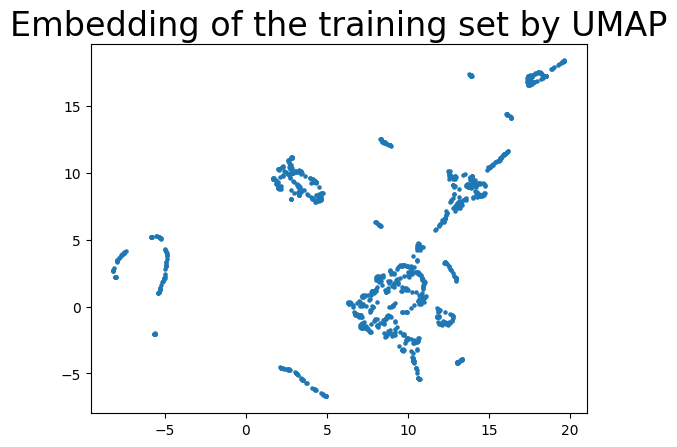

In [53]:
import matplotlib.pyplot as plt

plt.scatter(trans.embedding_[:, 0], trans.embedding_[:, 1], s= 5, cmap='Spectral')
plt.title('Embedding of the training set by UMAP', fontsize=24);

In [54]:
# dimensionality reduction
trans = umap.UMAP(n_neighbors=5, n_components=8, random_state=42).fit(X_train)

In [55]:
trans.embedding_

array([[ 9.395572 ,  6.269994 , 10.950806 , ...,  3.6834722,  1.2331719,
         5.724381 ],
       [ 8.253633 ,  4.3079195,  2.5031588, ...,  6.585675 ,  4.4413304,
         4.7385664],
       [ 8.328526 ,  3.9811563,  2.5189867, ...,  6.7888155,  4.5576267,
         4.7549133],
       ...,
       [ 9.843216 ,  6.1376276,  2.9551919, ...,  2.6969688,  4.6035185,
         8.733726 ],
       [ 9.4980135,  4.1699715,  4.9628315, ...,  2.8935292,  5.2599716,
         9.091412 ],
       [ 8.910097 ,  5.8048186,  3.0504122, ...,  3.5262613,  5.6204705,
         5.1901526]], dtype=float32)

In [56]:
pub_station_scaled = pd.DataFrame(data=trans.embedding_, index=pub_station.sid, columns=[ 'dim_' + str(i) for i in range(8)]).reset_index()
pub_station_scaled.head()

,sid,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7
0,서울_마포용산_상암월드컵경기장,9.40,6.27,10.95,7.34,5.93,3.68,1.23,5.72
1,제주_서귀포_대정읍사무소,8.25,4.31,2.50,8.71,10.96,6.59,4.44,4.74
2,제주_제주직할_애월119센터,8.33,3.98,2.52,9.12,11.16,6.79,4.56,4.75
3,대구_동대구_수성구민운동장,9.55,5.80,3.46,7.57,1.13,2.69,4.22,7.22
4,제주_제주직할_제주 삼양 유적지,8.26,4.36,2.47,8.66,10.95,6.57,4.42,4.75


In [57]:
pub_station_scaled.to_csv('../data/input_table/pubstation_umap-embedding.csv', index=False)